# Урок 3. Логистическая регрессия

Небольшой шаг назад...

Линейная регрессия
![img/lr.png](img/lr.png)

- Предсказываем значение у, которые могут принимать любые значения из R
- Предсказываем через линейную комбинацию $$\vec y = X \vec w$$
- Находим оптимальные W с помощью градиентного спуска
- Функция потерь (MSE): $$L(x, y, w) = \frac{1}{2n} \sum_{i=1}^n (y_i - \vec{w}^T \vec{x}_i)^2$$

Как же предсказать значения у == 0/1 ?

-

In [1]:
import numpy as np
import matplotlib.pyplot as plt

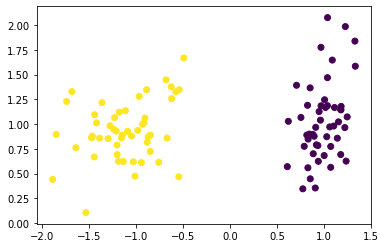

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1], c=y);

Функция потерь:  
$$L(𝑎,𝑋)=\frac{1}{l}\sum_{i=1}^n[𝑀𝑖<0]$$  
штрафуем за кол-во ошибок

In [3]:
def loss_func(x):
    return 0 if x > 0 else 1

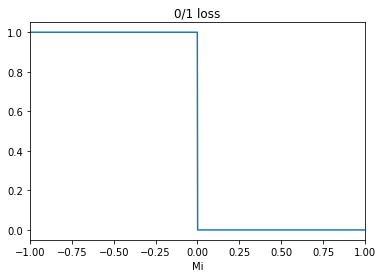

In [4]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.title('0/1 loss')
plt.plot(dots, zero_one_loss);

Логлосс:
- при у = {0;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = −\frac{1}{l}\sum_{i=1}^n(y_𝑖ln(a(x_i))+(1−y_𝑖)ln(1 - a(x_i))$$
- при у = {-1;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = - \sum_{i=1}^{\ell} \log (1 + \exp^{-a(x_i)})$$ где $$a(x_i) = y_i\vec{w}^T\vec{x_i}$$

In [5]:
def log_loss(x):
    return np.log2(1+np.exp(-x))

In [6]:
def exp_func(x):
    return np.exp(-x)

In [7]:
def square_loss(x):
    return (1 - x)**2

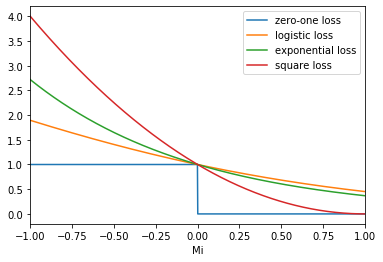

In [8]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]
log_losses = [log_loss(x) for x in dots]
exp_funces = [exp_func(x) for x in dots]
square_losses = [square_loss(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, zero_one_loss)
plt.plot(dots, log_losses)
plt.plot(dots, exp_funces)
plt.plot(dots, square_losses)
plt.legend(['zero-one loss', 'logistic loss', 'exponential loss', 'square loss']);

### Logreg на примере

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [10]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [11]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [12]:
def custom_StandardScaler(x):
    return (x - x.mean())/x.std()

In [13]:
X_st = X.copy()
X_st[2] = custom_StandardScaler(X_st[2])

In [14]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [15]:
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [16]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051565782628

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
z = np.linspace(-10, 10, 100)

p = sigmoid(z)

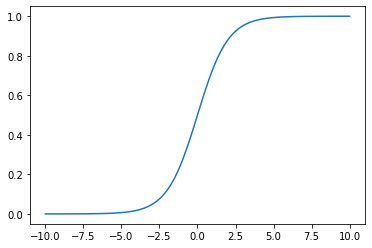

In [19]:
plt.plot(z, p);

In [20]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [21]:
W = logreg_eval_model(X_st, y, iterations=1000, alpha=1e-4)

итерация: 100, logloss: 1.5996538673708376, веса: [-1.76495316  0.08730161 -1.12929916 -0.64272316]
итерация: 200, logloss: 1.5767525572049883, веса: [-1.76108551  0.09900809 -1.1279574  -0.63405146]
итерация: 300, logloss: 1.554036925497323, веса: [-1.75724337  0.11066933 -1.12660468 -0.62541634]
итерация: 400, logloss: 1.5315150976159984, веса: [-1.75342735  0.12228271 -1.12524133 -0.61681915]
итерация: 500, logloss: 1.5091958490387767, веса: [-1.74963809  0.13384536 -1.12386772 -0.60826133]
итерация: 600, logloss: 1.4870886643594083, веса: [-1.74587627  0.14535416 -1.12248429 -0.59974443]
итерация: 700, logloss: 1.465203798107477, веса: [-1.7421426   0.15680564 -1.12109157 -0.59127007]
итерация: 800, logloss: 1.443552336114085, веса: [-1.73843781  0.16819602 -1.11969016 -0.58284002]
итерация: 900, logloss: 1.4221462556853233, веса: [-1.73476267  0.17952116 -1.11828074 -0.57445613]
итерация: 1000, logloss: 1.400998482285436, веса: [-1.731118    0.19077649 -1.11686409 -0.56612042]


### Домашнее задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

7. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

### Решение

In [22]:
# 1
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred + 1e-10) + (1.0 - y)*np.log(1.0 - y_pred + 1e-10))
    return np.sum(err)

y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051554671516

In [23]:
# 2 
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

W = logreg_eval_model(X_st, y, iterations=1000, alpha=10)

итерация: 100, logloss: 3.6193240297594094, веса: [-36.04067396 -19.90187823   1.47418131  36.34166037]
итерация: 200, logloss: 0.12076214257825783, веса: [-52.5953721   -6.66968447 -12.70036349  44.9023658 ]
итерация: 300, logloss: 0.09718545289343722, веса: [-58.09916368  -7.19924744 -14.09703203  50.0524698 ]
итерация: 400, logloss: 0.07550503117192928, веса: [-59.78266373  -5.91860403 -16.2561237   48.93844447]
итерация: 500, logloss: 0.07419618055472015, веса: [-60.69636377  -5.65857635 -16.79286692  49.05096545]
итерация: 600, logloss: 0.07344036380652139, веса: [-61.39789893  -5.65737883 -17.04618275  49.49308191]
итерация: 700, logloss: 0.0728192039313181, веса: [-62.07109815  -5.71953818 -17.23677325  49.96936405]
итерация: 800, logloss: 0.07267383626858129, веса: [-62.68128371  -5.89662369 -17.31078607  50.58897588]
итерация: 900, logloss: 0.07136833772307502, веса: [-63.35623893  -5.82136433 -17.60750477  50.99666205]
итерация: 1000, logloss: 0.07070210117134271, веса: [-63.

In [24]:
# 3
def calc_pred_proba(W, X):
    return sigmoid(np.dot(W,X))

y_proba = calc_pred_proba(W, X_st)
y_proba

array([2.80797515e-01, 2.51679078e-04, 1.00000000e+00, 9.81668511e-03,
       9.80538503e-01, 2.21567405e-03, 1.00000000e+00, 3.08203467e-03,
       7.10155549e-01, 1.00000000e+00])

In [25]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [26]:
# 4
def calc_pred(W, X, a=0.5):
    p = calc_pred_proba(W, X)
    result = (p > a).astype(int)
    return result

y_pred = calc_pred(W, X_st, a=0.5)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [27]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [28]:
# 5

def get_matrix(y_pred, y):
    matrix = np.array([[0]*(len(set(y))) for i in range(len(set(y)))])
    for pred, exp in zip(y_pred, y):
        matrix[int(pred)][int(exp)] += 1
    return matrix

def get_acc(y_pred, y):
    return np.sum([y_pred[i] == y[i] for i in range(len(y))])/len(y)

def get_recall_pres(matrix):
    recall = matrix[0][0]/np.sum(matrix[:, 0])
    pres = matrix[0][0]/np.sum(matrix[0, :])
    return recall, pres

In [29]:
matrix = get_matrix(y_pred, y)
matrix

array([[5, 0],
       [0, 5]])

In [30]:
recall, pres = get_recall_pres(matrix)
recall, pres

(1.0, 1.0)

In [31]:
get_acc(y_pred, y)

1.0

№ 6 Ответ 

Переобучается так как данных крайне мало. Так же это понятно потому, что все метрики показывают идеальный результат.

7. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [32]:
def logreg_eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T) + lambda_ *  np.sign(W))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [33]:
W = logreg_eval_model_l1(X_st, y, iterations=1000, alpha=10)

итерация: 100, logloss: 5.0064050140045016, веса: [-30.35593037  -3.9286827   -1.86677238  39.32421177]
итерация: 200, logloss: 6.963144490009768, веса: [-48.25185298  -6.10437689  -9.62056393  51.04324993]
итерация: 300, logloss: 0.07934885422607414, веса: [-57.03045115  -5.90584753 -15.29680942  47.13721819]
итерация: 400, logloss: 0.07742890257125701, веса: [-58.13759706  -5.52006867 -15.99860027  47.06085235]
итерация: 500, logloss: 0.07582989502748189, веса: [-61.85484954  -6.90604497 -16.23082266  51.99485032]
итерация: 600, logloss: 0.07164230302777586, веса: [-63.16036105  -6.11029133 -17.30289628  51.43890897]
итерация: 700, logloss: 0.07062689454088722, веса: [-63.98517139  -5.89748302 -17.76600402  51.58153198]
итерация: 800, logloss: 0.06996655346680314, веса: [-64.64518027  -5.8885638  -18.01011468  51.98353572]
итерация: 900, logloss: 0.06933768739499596, веса: [-65.2647864   -5.92141732 -18.20372633  52.43756772]
итерация: 1000, logloss: 0.06872419071973807, веса: [-65.8

In [34]:
def logreg_eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [35]:
W = logreg_eval_model_l2(X_st, y, iterations=1000, alpha=10)

итерация: 100, logloss: 5.357841107227733, веса: [-31.80332207  -7.07987927   0.9323586   42.29287608]
итерация: 200, logloss: 0.12138737980209595, веса: [-51.62907452  -5.98876439 -13.25924933  44.7367025 ]
итерация: 300, logloss: 0.08384343103802216, веса: [-57.93973901  -6.72568076 -14.7592956   49.18701943]
итерация: 400, logloss: 0.07574547126067574, веса: [-59.42251035  -5.76772157 -16.2451595   48.44119266]
итерация: 500, logloss: 0.07468963587629683, веса: [-60.26848543  -5.6047766  -16.68611256  48.67905268]
итерация: 600, logloss: 0.07540245548503956, веса: [-61.01167452  -5.72929576 -16.87646723  49.0946945 ]
итерация: 700, logloss: 0.0733656967929036, веса: [-64.05684243  -7.16044551 -16.85735761  53.81310585]
итерация: 800, logloss: 0.06949905216735028, веса: [-65.32032918  -6.36714065 -17.87829528  53.26535109]
итерация: 900, logloss: 0.0683915771127556, веса: [-66.16358985  -6.08589434 -18.38491924  53.31267175]
итерация: 1000, logloss: 0.06776517939821394, веса: [-66.81

In [36]:
# как видно по логлосу есть разница в тысячных